In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

embedding_path = f'../../data/embeddings/bert_embedding_title.csv'
data = pd.read_csv(embedding_path)

embedding_col = [col for col in data.columns if  col.startswith('dim_')]

X = data[embedding_col].values
X_scaled = StandardScaler().fit_transform(X)


In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


NameError: name 'X_scaled' is not defined

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, max_iter=1000, random_state=42)
X_reduced = tsne.fit_transform(X_scaled)


c:\Users\Hiep\.conda\envs\data_eng\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


: 

: 

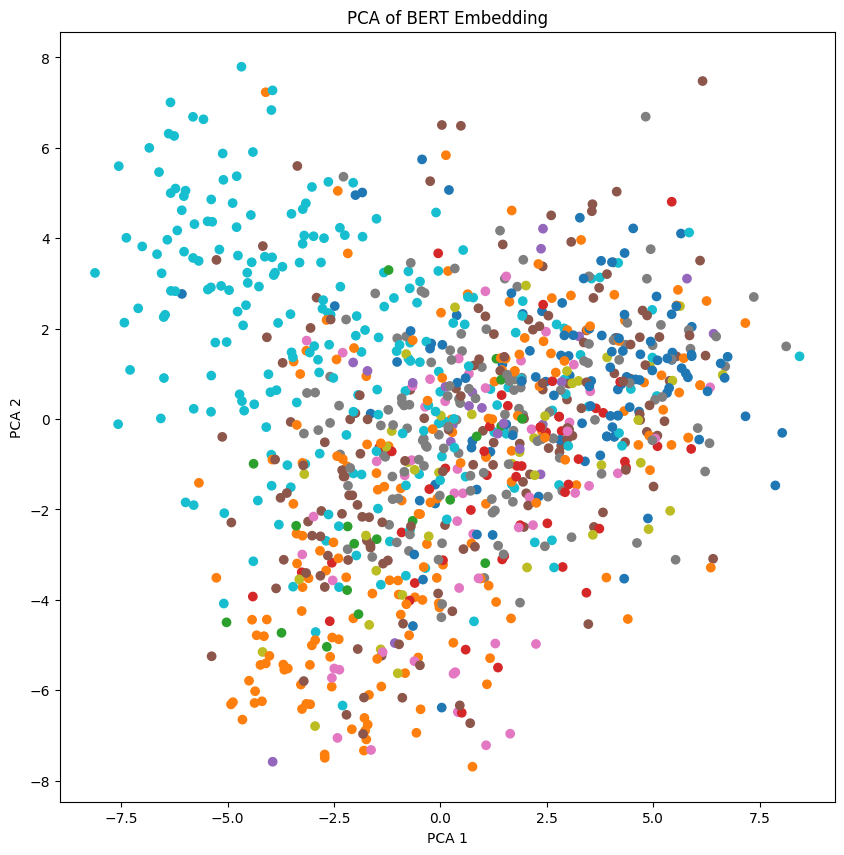

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(X_reduced[:1000, 0], X_reduced[:1000, 1], c=data['label'][:1000], cmap='tab10')
# for i, title in enumerate(data['title'][:500]):
#     plt.annotate(title, (X_reduced[i, 0], X_reduced[i, 1]))

plt.title('PCA of BERT Embedding')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [4]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Chuẩn bị dữ liệu giống như trên
df = pd.read_csv(embedding_path)
first_5_labels = sorted(df['label'].unique())[:5]
df = df[df['label'].isin(first_5_labels)]

# Lấy mẫu
df_sample = df.sample(n=10000, random_state=42)
embedding_cols = [col for col in df_sample.columns if col.startswith('dim_')]
X = df_sample[embedding_cols].values

# PCA
pca = PCA(n_components=2)
df_sample[['x', 'y']] = pca.fit_transform(X)

# Plotly scatter
fig = px.scatter(df_sample, x='x', y='y', color='label', hover_data=['title'])
fig.update_layout(title='Embedding Visualization (Plotly Interactive)')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [20]:
!pip install umap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3550 sha256=330555df94ad87b416605a51b78b9604d5c308866c94b82cca7e6bf13e7e8389
  Stored in directory: c:\users\hiep\appdata\local\pip\cache\wheels\82\d8\73\e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap


  DEPRECATION: Building 'umap' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'umap'. Discussion can be found at https://github.com/pypa/pip/issues/6334
